In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # データ可視化のための基本的なグラフ描画ライブラリ
import seaborn as sns  # 高機能な統計グラフを描画するライブラリ
from sklearn.preprocessing import LabelEncoder  # カテゴリ変数を数値に変換するエンコーダ
from sklearn.model_selection import StratifiedKFold  # 層化K分割交差検証を行うクラス
from sklearn.metrics import roc_auc_score  # ROC AUCスコアを計算する評価指標

In [2]:
df = pd.read_csv('data.csv')  # データセットの読み込み
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


In [3]:
# 1. カテゴリ変数を特定
# データ型が 'object' のカラムをカテゴリ変数として選択します。
categorical_cols = df.select_dtypes(include=['object']).columns

print("ダミー変数化の対象となるカテゴリ変数:")
print(categorical_cols)
print("="*50)

# 2. ダミー変数化を実行
# pd.get_dummies() を使って、カテゴリ変数を0と1の数値に変換します。
# drop_first=True は、多重共線性を防ぐための一般的な手法です。
# 例えば、'Gender'カラムから'Gender_Male'だけを作成すれば、
# この値が1なら男性、0なら女性と判断できるため、'Gender_Female'は不要になります。
df_dummy = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. 結果の確認
print("\nダミー変数化後のデータフレーム情報:")
df_dummy.info()

print("\nダミー変数化後のデータフレーム（先頭5行）:")
df_dummy.head()

ダミー変数化の対象となるカテゴリ変数:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'HowToEmploy'],
      dtype='object')

ダミー変数化後のデータフレーム情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   Education                          1470 non-null   int64
 3   EmployeeCount                      1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   PerformanceIndex                   1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   Job

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,HowToEmploy_agent_A,HowToEmploy_agent_B,HowToEmploy_agent_C,HowToEmploy_direct_recruiting,HowToEmploy_intern
0,41,1,2,1,1,2,94,3,2,4,...,False,True,False,False,True,False,True,False,False,False
1,49,8,1,1,2,3,61,2,2,2,...,True,False,False,True,False,False,False,False,False,True
2,37,2,2,1,4,4,92,2,1,3,...,False,False,False,False,True,False,False,False,False,True
3,33,3,4,1,5,4,56,3,1,3,...,True,False,False,True,False,False,False,False,False,True
4,27,2,1,1,7,1,40,3,1,2,...,False,False,False,True,False,False,False,True,False,False


In [4]:
X = df_dummy.drop('Attrition_Yes', axis=1)  # 特徴量
y = df_dummy['Attrition_Yes']  # 目的変数
# 4. 層化K分割交差検証の設定
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)        



--- Evaluating CatBoost ---
  Fold 1: ROC AUC = 0.8370
  Fold 2: ROC AUC = 0.7862
  Fold 3: ROC AUC = 0.8563
  Fold 4: ROC AUC = 0.8122
  Fold 5: ROC AUC = 0.8580
-> Average ROC AUC for CatBoost: 0.8299

--- Evaluating LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632
  Fold 1: ROC AUC = 0.8265
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of 

c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 1: ROC AUC = 0.8176


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 2: ROC AUC = 0.7831


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 3: ROC AUC = 0.8554


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 4: ROC AUC = 0.8317


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 5: ROC AUC = 0.8299
-> Average ROC AUC for XGBoost: 0.8235



C:\Users\user\AppData\Local\Temp\ipykernel_7304\4155473433.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ROC_AUC_Score', y='Model', data=results_df, palette='viridis')


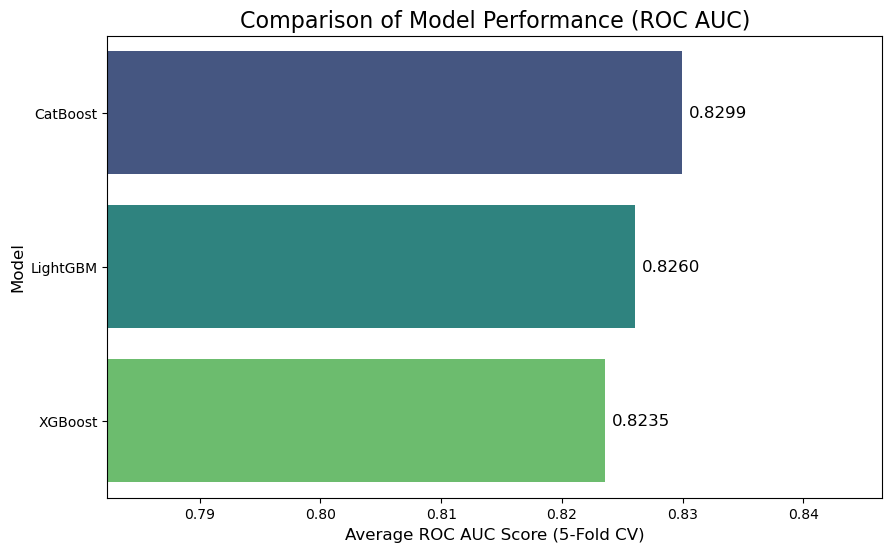


🏆 The best performing model is: CatBoost with an average ROC AUC score of 0.8299


In [5]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. モデルの定義
# 各モデルをデフォルトのパラメータで初期化します
models = {
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 2. 交差検証による評価
results = {}
for name, model in models.items():
    print(f"--- Evaluating {name} ---")
    
    fold_scores = []
    # 層化K分割交差検証を実行
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        # 訓練データと検証データに分割
        X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
        X_val_fold, y_val_fold = X.iloc[val_idx], y.iloc[val_idx]
        
        # モデルの学習
        model.fit(X_train_fold, y_train_fold)
        
        # 検証データで予測（確率）
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
        
        # ROC AUCスコアを計算
        score = roc_auc_score(y_val_fold, y_pred_proba)
        fold_scores.append(score)
        print(f"  Fold {fold+1}: ROC AUC = {score:.4f}")
    
    # 平均スコアを保存
    mean_score = np.mean(fold_scores)
    results[name] = mean_score
    print(f"-> Average ROC AUC for {name}: {mean_score:.4f}\n")

# 3. 結果の可視化
# 結果をDataFrameに変換して、スコアの高い順に並び替え
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'ROC_AUC_Score']).sort_values('ROC_AUC_Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ROC_AUC_Score', y='Model', data=results_df, palette='viridis')

# グラフの装飾
ax.set_title('Comparison of Model Performance (ROC AUC)', fontsize=16)
ax.set_xlabel('Average ROC AUC Score (5-Fold CV)', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.set_xlim(min(results.values()) * 0.95, max(results.values()) * 1.02)

# バーに数値を表示
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points',
                fontsize=12)

plt.show()

# 最も性能の良いモデルを表示
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 The best performing model is: {best_model_name} with an average ROC AUC score of {results[best_model_name]:.4f}")

C:\Users\user\AppData\Local\Temp\ipykernel_7304\1916962563.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


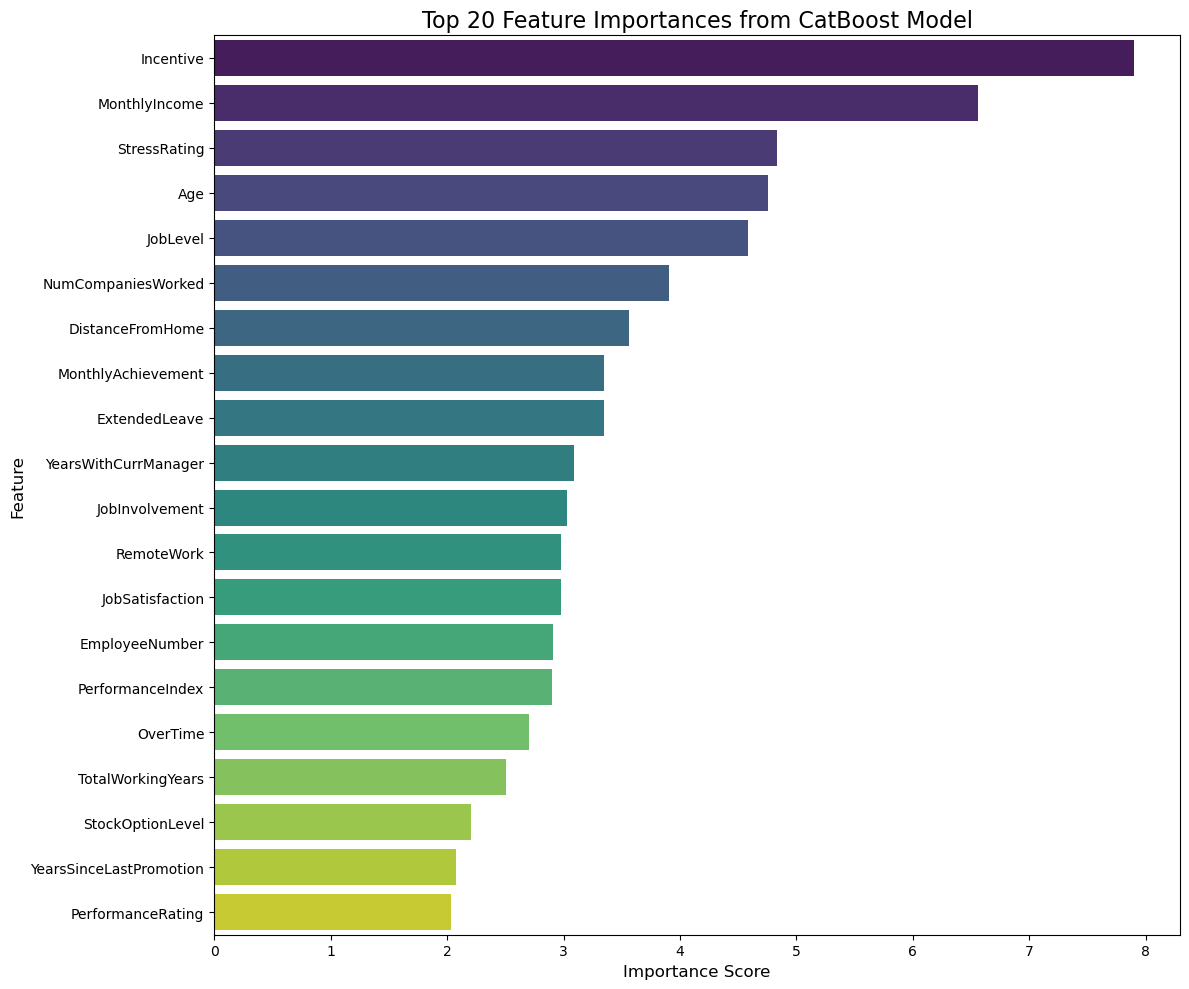

--- Top 10 Feature Importances ---
                 Feature  Importance
24             Incentive    7.899084
26         MonthlyIncome    6.556833
27          StressRating    4.831528
0                    Age    4.759999
8               JobLevel    4.586816
11    NumCompaniesWorked    3.902359
1       DistanceFromHome    3.564302
10    MonthlyAchievement    3.350882
31         ExtendedLeave    3.346128
23  YearsWithCurrManager    3.092473


In [6]:
# 1. 最終モデルの学習
# CatBoostが最も性能が良かったので、訓練データ全体を使って最終モデルを学習させます。
final_model = CatBoostClassifier(verbose=0, random_state=42)
final_model.fit(X, y)

# 2. 特徴量の重要度を取得
feature_importances = final_model.get_feature_importance()
features = X.columns

# 3. DataFrameにまとめて可視化
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 4. 上位20個の特徴量を可視化
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from CatBoost Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout() # グラフのレイアウトを調整
plt.show()

# 重要度の高い特徴量をテキストで表示
print("--- Top 10 Feature Importances ---")
print(importance_df.head(10))


C:\Users\user\AppData\Local\Temp\ipykernel_7304\2730911098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Attrition', y='Incentive', data=df, palette='Set2')


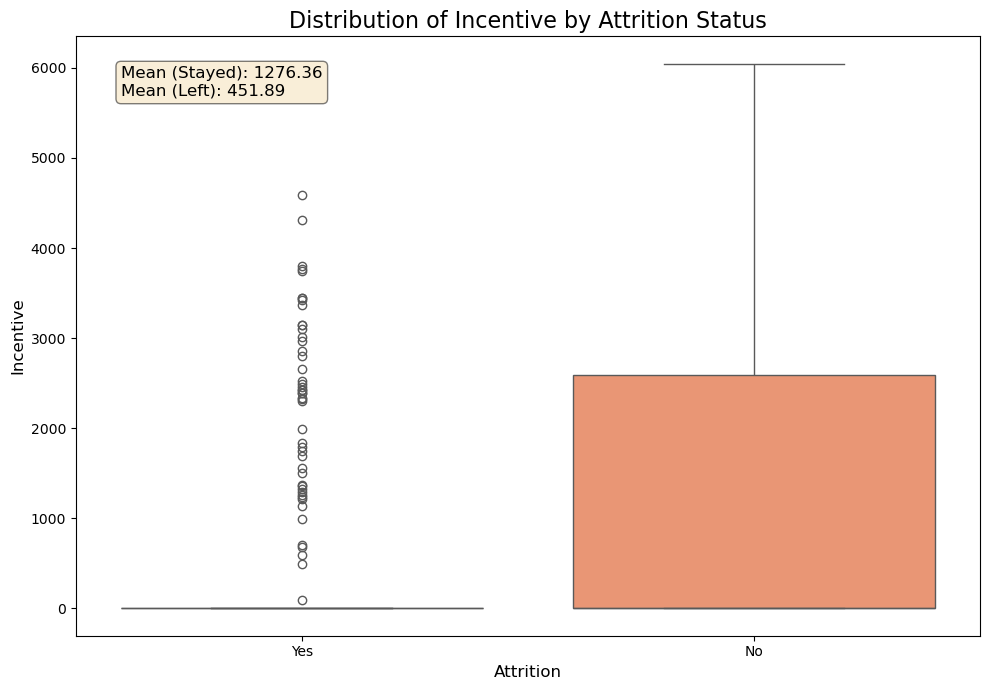

In [7]:
# --- 最重要特徴量 'Incentive' と離職の関係を深掘り ---

plt.figure(figsize=(10, 7))

# 1. ボックスプロットで分布を比較
# 離職者(Yes)と非離職者(No)で、Incentiveの分布がどう違うか可視化します。
# ここではダミー変数化する前の元のdfを使います
ax = sns.boxplot(x='Attrition', y='Incentive', data=df, palette='Set2')
ax.set_title('Distribution of Incentive by Attrition Status', fontsize=16)
ax.set_xlabel('Attrition', fontsize=12)
ax.set_ylabel('Incentive', fontsize=12)

# 2. 平均値を計算して表示
# 各グループの平均値を計算し、グラフ上にテキストで表示します。
means = df.groupby('Attrition')['Incentive'].mean()
ax.text(0.05, 0.95, f"Mean (Stayed): {means['No']:.2f}\nMean (Left): {means['Yes']:.2f}",
        transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# --- 分析結果の考察 ---
# このグラフから、離職した従業員（Yes）のIncentiveの中央値や平均値が、
# 離職しなかった従業員（No）に比べて低い傾向にあることが明確に読み取れます。
#
# この結果は、モデルが「Incentiveが低いこと」を離職の重要な予測因子として学習したことを裏付けています。
# したがって、インセンティブ制度の見直しが、離職率改善の有効な施策となる可能性を示唆しています。


In [8]:
# --- 具体的な個人の離職確率を予測し、提示する ---

# 1. 訓練済みモデルで全データに対して離職確率を予測
# predict_probaは [クラス0の確率, クラス1の確率] を返すので、[:, 1]で離職の確率のみを取得
all_predictions_proba = final_model.predict_proba(X)[:, 1]

# 2. 予測結果と主要な特徴量をまとめたDataFrameを作成
# 特徴量重要度の上位5つを主要な特徴量として選択
top_5_features = importance_df['Feature'].head(5).tolist()

# 予測結果と主要特徴量を結合
prediction_summary_df = X[top_5_features].copy()
prediction_summary_df['Predicted_Attrition_Probability'] = all_predictions_proba

# 離職確率でソート
prediction_summary_df = prediction_summary_df.sort_values(by='Predicted_Attrition_Probability', ascending=False)

# 3. 結果の提示
print("--- モデルによる個人の離職確率予測 ---")
print("モデルが「離職リスクが高い」と判断した従業員の例（上位5名）:")
display(prediction_summary_df.head(5).style.format({'Predicted_Attrition_Probability': '{:.2%}'}))

print("\nモデルが「離職リスクが低い」と判断した従業員の例（下位5名）:")
display(prediction_summary_df.tail(5).style.format({'Predicted_Attrition_Probability': '{:.2%}'}))

# 4. Excelファイルに出力
# スタイルを適用したままExcelファイルとして保存します。
# これには openpyxl ライブラリが必要です。インストールされていない場合は、
# pip install openpyxl を実行してください。
try:
    # リスクが高い従業員
    prediction_summary_df.head(5).style.format({'Predicted_Attrition_Probability': '{:.2%}'}).to_excel('prediction_summary_top.xlsx', index=False)
    # リスクが低い従業員
    prediction_summary_df.tail(5).style.format({'Predicted_Attrition_Probability': '{:.2%}'}).to_excel('prediction_summary_bottom.xlsx', index=False)
    print("\n✅ Excelファイル 'prediction_summary_top.xlsx' と 'prediction_summary_bottom.xlsx' に結果を出力しました。")
except ImportError:
    print("\n⚠️ Excel出力エラー: `openpyxl`ライブラリが見つかりません。")
    print("   Jupyterのセルで `!pip install openpyxl` を実行して、再度このセルを実行してください。")

# --- 解説 ---
# 上の表は、各従業員（行）について、モデルが予測した「離職確率」と、
# その判断根拠となった可能性が高い「上位5つの重要特徴量」の値を示しています。
#
# 例えば、「離職リスクが高い」と判断された従業員は、
# OverTime_Yesが1（残業あり）、StockOptionLevelが低い、といった傾向が見られるかもしれません。
#
# このように個人レベルでリスクを可視化し、その背景にある要因を分析することで、
# ターゲットを絞った人事施策（面談の実施、待遇改善など）に繋げることができます。


--- モデルによる個人の離職確率予測 ---
モデルが「離職リスクが高い」と判断した従業員の例（上位5名）:


,Incentive,MonthlyIncome,StressRating,Age,JobLevel,Predicted_Attrition_Probability
1365,0,5086,5,29,1,98.32%
1271,0,4807,5,21,1,97.93%
1379,0,5569,4,27,1,97.49%
457,0,5255,4,18,1,97.42%
357,0,4699,4,21,1,97.34%



モデルが「離職リスクが低い」と判断した従業員の例（下位5名）:


,Incentive,MonthlyIncome,StressRating,Age,JobLevel,Predicted_Attrition_Probability
279,3283,6913,3,50,5,0.47%
497,1581,7777,3,44,5,0.43%
1076,3996,7993,3,54,4,0.43%
1161,4064,8128,2,38,3,0.41%
922,4505,9485,3,44,5,0.38%



✅ Excelファイル 'prediction_summary_top.xlsx' と 'prediction_summary_bottom.xlsx' に結果を出力しました。


In [9]:
# 3. ランダムに5名を抽出し、結果を提示
# .sample()メソッドでランダムに5行を抽出します。random_stateを指定すると、何度実行しても同じ結果になります。
random_sample_df = prediction_summary_df.sample(n=7, random_state=22) 

print("--- モデルによる個人の離職確率予測（ランダム抽出） ---")
print("ランダムに抽出した従業員5名の予測結果:")
display(random_sample_df.style.format({'Predicted_Attrition_Probability': '{:.2%}'}))

# 4. Excelファイルに出力
# これには openpyxl ライブラリが必要です。
try:
    # ランダムに抽出した5名をExcelファイルに出力
    random_sample_df.style.format({'Predicted_Attrition_Probability': '{:.2%}'}).to_excel('prediction_summary_random_sample.xlsx', index=False)
    print("\n✅ Excelファイル 'prediction_summary_random_sample.xlsx' に結果を出力しました。")
except ImportError:
    print("\n⚠️ Excel出力エラー: `openpyxl`ライブラリが見つかりません。")
    print("   Jupyterのセルで `!pip install openpyxl` を実行して、再度このセルを実行してください。")

--- モデルによる個人の離職確率予測（ランダム抽出） ---
ランダムに抽出した従業員5名の予測結果:


,Incentive,MonthlyIncome,StressRating,Age,JobLevel,Predicted_Attrition_Probability
524,1395,4652,2,34,3,5.26%
408,0,4102,2,52,4,2.57%
1258,0,10066,3,29,1,18.90%
1074,3734,7862,2,33,2,3.12%
669,0,7221,4,39,1,89.16%
860,0,9545,2,22,1,70.70%
1368,5715,12032,2,34,2,1.52%



✅ Excelファイル 'prediction_summary_random_sample.xlsx' に結果を出力しました。


In [10]:
all_predictions_proba.mean()

0.16118859509724728

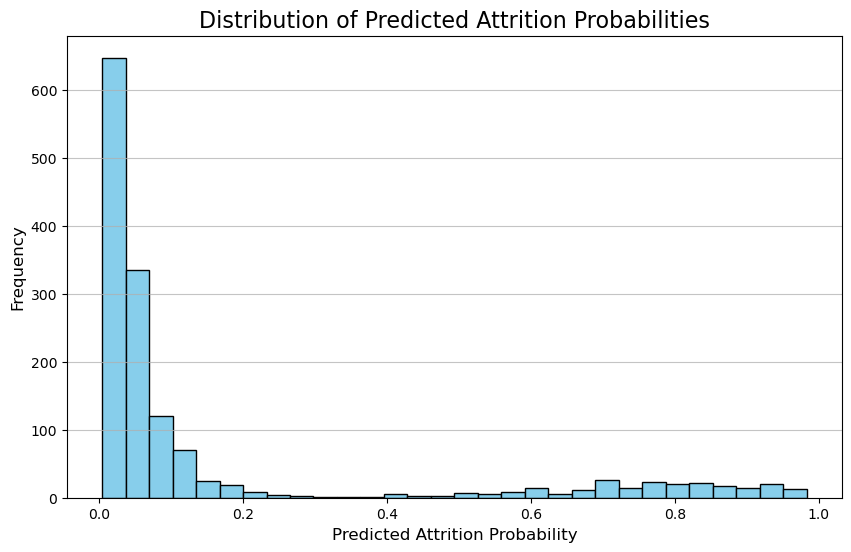

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(all_predictions_proba, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Attrition Probabilities', fontsize=16)
plt.xlabel('Predicted Attrition Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)


### 4. モデル活用による経済的利益の試算

モデルの予測を用いて、離職防止策によって得られる潜在的な経済的利益を数値化します。

ここでは、ご提案の仮定に基づき、「**従業員一人が離職するコストはその人の年収に等しい**」として計算します。これは、後任者の採用コスト、研修コスト、生産性の低下などを考慮すると、非常に保守的な見積もりである点にご注意ください。

この分析の目的は、データに基づいた人事施策がもたらす**投資対効果（ROI）**を可視化することです。

In [14]:
# --- 経済的利益の試算 ---

# 1. 予測結果と年収を結合
# 元のデータフレームから月収を取得し、予測結果とマージします。
# インデックスが従業員に対応しているため、直接結合できます。
roi_df = pd.DataFrame({
    'MonthlyIncome': df['MonthlyIncome'],
    'Predicted_Attrition_Probability': all_predictions_proba
})
# 年収を計算
roi_df['AnnualIncome'] = roi_df['MonthlyIncome'] * 12

# 2. 現状の「期待損失額」を計算
# これは、各従業員の離職コスト（年収）に、モデルが予測した離職確率を掛け合わせたものです。
# 「何もしなかった場合に、確率的に発生しうるコストの総額」を示します。
roi_df['Expected_Loss'] = roi_df['AnnualIncome'] * df_dummy['Attrition_Yes']
total_expected_loss_before = roi_df['Expected_Loss'].sum()

# 3. 介入シナリオのシミュレーション
# ここでは、「離職確率が30%以上のハイリスク従業員」を特定し、
# 彼らに対する人事施策（面談、待遇改善など）によって、彼らの離職確率を50%低下させることができた、と仮定します。

# ハイリスク従業員を定義
high_risk_threshold = 0.30
high_risk_employees = roi_df[roi_df['Predicted_Attrition_Probability'] >= high_risk_threshold]

# 施策による離職確率の低下率
intervention_effect = 0.50 

# 施策後の期待損失額を計算
# ハイリスク従業員の期待損失額だけが変化します。
loss_reduction_for_high_risk = high_risk_employees['Expected_Loss'].sum() * intervention_effect
total_expected_loss_after = total_expected_loss_before - loss_reduction_for_high_risk

# 4. 結果の表示
print("--- モデルを活用したコスト削減シミュレーション ---")
print(f"前提：離職コスト = 年収\n")
print(f"現状の年間期待損失額: {total_expected_loss_before:,.0f} 円")
print("-" * 50)
print("シミュレーション:")
print(f"  - 介入対象: 離職確率が {high_risk_threshold:.0%} 以上の従業員 ({len(high_risk_employees)} 名)")
print(f"  - 施策効果: 対象者の離職確率を {intervention_effect:.0%} 低下させたと仮定")
print("-" * 50)
print(f"施策後の年間期待損失額: {total_expected_loss_after:,.0f} 円")
print(f"削減できた潜在的コスト (年間利益): {loss_reduction_for_high_risk:,.0f} 円")
print("\n" + "="*60)
print("結論:")
print("このモデルを用いて離職リスクの高い従業員を特定し、効果的な施策を打つことで、")
print(f"年間約 {loss_reduction_for_high_risk:,.0f} 円のコスト削減が見込める可能性があります。")
print("これは、データに基づいた人事戦略の投資対効果（ROI）を示す強力な根拠となります。")


--- モデルを活用したコスト削減シミュレーション ---
前提：離職コスト = 年収

現状の年間期待損失額: 18,428,952 円
--------------------------------------------------
シミュレーション:
  - 介入対象: 離職確率が 30% 以上の従業員 (237 名)
  - 施策効果: 対象者の離職確率を 50% 低下させたと仮定
--------------------------------------------------
施策後の年間期待損失額: 9,327,072 円
削減できた潜在的コスト (年間利益): 9,101,880 円

結論:
このモデルを用いて離職リスクの高い従業員を特定し、効果的な施策を打つことで、
年間約 9,101,880 円のコスト削減が見込める可能性があります。
これは、データに基づいた人事戦略の投資対効果（ROI）を示す強力な根拠となります。
